# Credit Card Fraud Detection/Anomaly Detection

### Context:
We will be using Machine Learning to predict whether or not a credit card transaction was fraudulent. Fraudulent transactions not only directly hurt the Credit Card companies' bottom lines, but also pose an indirect threat in customer retention. 

We will compare ML algorithms based on two factors. The first is how accurately they can predict whether or not a charge was fraudulent. The second will be the percentage of false positives that occur. 

In [1]:
# Importing dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Finding current working directory
os.getcwd()

'C:\\Users\\brenden.lemay'

In [3]:
# Navigating to Downloads folder before loading in the data
os.chdir('./Downloads')

In [4]:
os.getcwd()

'C:\\Users\\brenden.lemay\\Downloads'

In [5]:
#Loading in the data
df = pd.read_csv('./creditcard.csv')

- The time column is the amount of seconds from the first transaction in the dataset
- Columns V1-V28 are encrypted from the credit card agency
- Amount is the amount of the transaction
- Class is a flag which is changed to a value of 1 for transactions identified as fraudulent

In [6]:
# taking a look at the first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
# As we can see below, there are no null/missing values. 
# This is due to the DCA transformation being applied to this confidential data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [11]:
# Class 1 is transactions that have been identified as fraudulent.
# Let's see how many fraudulent transactions there are in the dataset.
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
not_fraud = df[df['Class']==0]
not_fraud.mean()

Time      94838.202258
V1            0.008258
V2           -0.006271
V3            0.012171
V4           -0.007860
V5            0.005453
V6            0.002419
V7            0.009637
V8           -0.000987
V9            0.004467
V10           0.009824
V11          -0.006576
V12           0.010832
V13           0.000189
V14           0.012064
V15           0.000161
V16           0.007164
V17           0.011535
V18           0.003887
V19          -0.001178
V20          -0.000644
V21          -0.001235
V22          -0.000024
V23           0.000070
V24           0.000182
V25          -0.000072
V26          -0.000089
V27          -0.000295
V28          -0.000131
Amount       88.291022
Class         0.000000
dtype: float64

In [21]:
fraud = df[df['Class']==1]
fraud.mean()

Time      80746.806911
V1           -4.771948
V2            3.623778
V3           -7.033281
V4            4.542029
V5           -3.151225
V6           -1.397737
V7           -5.568731
V8            0.570636
V9           -2.581123
V10          -5.676883
V11           3.800173
V12          -6.259393
V13          -0.109334
V14          -6.971723
V15          -0.092929
V16          -4.139946
V17          -6.665836
V18          -2.246308
V19           0.680659
V20           0.372319
V21           0.713588
V22           0.014049
V23          -0.040308
V24          -0.105130
V25           0.041449
V26           0.051648
V27           0.170575
V28           0.075667
Amount      122.211321
Class         1.000000
dtype: float64

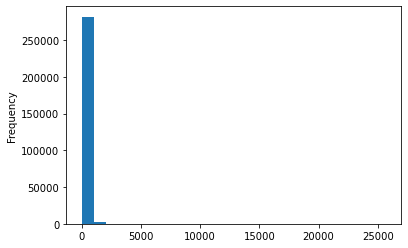

In [13]:
df.Amount.plot(kind='hist', bins=25)
plt.show()

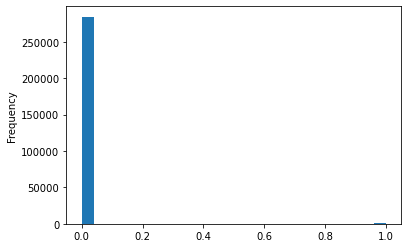

In [14]:
df.Class.plot(kind='hist', bins=25)
plt.show()

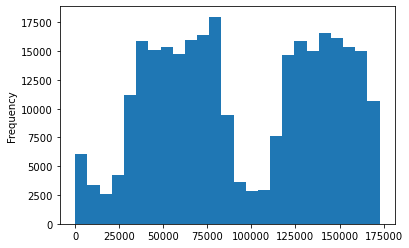

In [15]:
df.Time.plot(kind='hist',bins=25)